Pruebas en el modelo v6

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import _init_paths

import os

import torch
import torch.utils.data
from opts import opts
from models.model import create_model, load_model, save_model
from models.data_parallel import DataParallel
from logger import Logger
from datasets.dataset_factory import get_dataset
from trains.train_factory import train_factory
import cv2
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from detectors.detector_factory import detector_factory

image_ext = ['jpg', 'jpeg', 'png', 'webp']
video_ext = ['mp4', 'mov', 'avi', 'mkv']
time_stats = ['tot', 'load', 'pre', 'net', 'dec', 'post', 'merge']

In [2]:
sys.argv = ['-f', 'ctdet', '--demo', '../images/yolo/', '--arch','dla_34',  '--load_model' ,'../models/ctdet_coco_dla_2x.pth'] #cmd = 'ctdet --exp_id coco_dla --batch_size 4 --lr 1.25e-4  --gpus 0 --num_workers 0'
opt = opts().parse()
print(opt.task)

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  C:\Users\avata\FewShot-CenterNet\src\lib\..\..\exp\ctdet\default
ctdet


In [3]:
opt = opts().init()

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  C:\Users\avata\FewShot-CenterNet\src\lib\..\..\exp\ctdet\default
heads {'hm': 80, 'wh': 2, 'reg': 2}


In [4]:
os.environ['CUDA_VISIBLE_DEVICES'] = opt.gpus_str
opt.debug = max(opt.debug, 1)
Detector = detector_factory[opt.task]
detector = Detector(opt)

Creating model...
loaded ../models/ctdet_coco_dla_2x.pth, epoch 230


In [26]:
detector.model

DLASeg(
  (base): DLA(
    (base_layer): Sequential(
      (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (level0): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (level1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (level2): Tree(
      (tree1): BasicBlock(
        (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (re

In [5]:
image_names = [opt.demo]
#image_names.append('../images/Perro1.jpg')
"""
image_names.append('../images/aceite_4.png')
image_names.append('../images/cubix_0.png')
image_names.append('../images/cubix_5.png')
image_names.append('../images/te_0.png')
image_names.append('../images/te_8.png')
"""
image_names = []
ls = os.listdir(opt.demo)
for file_name in sorted(ls):
  ext = file_name[file_name.rfind('.') + 1:].lower()
  if ext in image_ext:
      image_names.append(os.path.join(opt.demo, file_name))
print(image_names)

['../images/yolo/aceite_0.png', '../images/yolo/aceite_4.png', '../images/yolo/aerosol_0.png', '../images/yolo/aerosol_4.png', '../images/yolo/azucarero_0.png', '../images/yolo/azucarero_4.png', '../images/yolo/balsamo_0.png', '../images/yolo/balsamo_4.png', '../images/yolo/borrador_0.png', '../images/yolo/borrador_4.png', '../images/yolo/cafe_0.png', '../images/yolo/cafe_5.png', '../images/yolo/cera_0.png', '../images/yolo/cera_4.png', '../images/yolo/coca_0.png', '../images/yolo/coca_5.png', '../images/yolo/colador_0.png', '../images/yolo/colador_5.png', '../images/yolo/cubix_0.png', '../images/yolo/cubix_5.png', '../images/yolo/leche_4.png', '../images/yolo/leche_8.png', '../images/yolo/pelota_0.png', '../images/yolo/pelota_3.png', '../images/yolo/te_0.png', '../images/yolo/te_8.png']


In [10]:
descriptores = {}
heatmaps = {}
m = torch.nn.ReLU()
for (image_name) in image_names:
    print(image_name)
    ret = detector.run(image_name)
    output = ret['output']
    print(output['descriptor'].size())
    
    descriptores[image_name] = torch.nn.ReLU()(output['descriptor'].squeeze(0)[:,62,64])
    #descriptores[image_name] = (output['descriptor'].squeeze(0)[:,int(topk_xs),int(topk_ys)])
    print('-------------------------')

../images/yolo/aceite_0.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/aceite_4.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/aerosol_0.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/aerosol_4.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/azucarero_0.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/azucarero_4.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/balsamo_0.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/balsamo_4.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/borrador_0.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/borrador_4.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/cafe_0.png
torch.Size([1, 256, 128, 128])
-------------------------
../images/yolo/cafe_5.png
torch.Size([1, 256, 128, 12

In [13]:
from torch.nn.functional import normalize
import numpy as np

In [14]:
def cosdis(x,y):
    x = x.unsqueeze(0)
    y = y.unsqueeze(1)
    x_n = normalize(x,dim=1)
    y_n = normalize(y,dim=0)
    return x_n@y_n

In [15]:
D = []
for i in range(len(image_names)):
    D.append(descriptores[image_names[i]])

In [25]:
descriptores

{'../images/yolo/aceite_0.png': tensor([0.3894, 0.0000, 1.0980, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.4725, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.3249,
         0.0000, 0.0000, 0.0000, 0.4453, 0.0000, 1.3134, 0.0000, 0.0277, 0.0000,
         0.0000, 0.0000, 1.2662, 0.0000, 0.7872, 2.3103, 0.0000, 0.3706, 0.0000,
         0.0000, 0.0000, 0.0350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5205,
         0.4532, 0.0000, 0.7368, 0.6175, 0.0000, 0.0000, 0.0000, 0.0000, 0.5247,
         0.0000, 0.0000, 0.0000, 0.4543, 2.0439, 0.0000, 0.4679, 1.0900, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.4991, 0.0000, 0.6178, 0.0000,
         0.9111, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0968, 0.4405, 0.0000,
         0.5276, 0.0000, 0.5273, 0.7678, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.4702, 0.4814, 0.0000, 0.0000, 1.1043, 0.000

In [16]:
matrix = torch.zeros((len(image_names),len(image_names)))
for i in range(len(image_names)):
    for j in range(len(image_names)):
        score = cosdis(D[i],D[j])[0,0]
        matrix[i,j]=score  
    
np_matrix = np.array(matrix)

In [17]:
image_names_ext = [n[n.rfind('/')+1:n.rfind('_')] for n in image_names]
image_names_ext2 = [n[n.rfind('/')+1:n.rfind('.')] for n in image_names]

In [18]:
for i in range(len(image_names)):
    for j in range(len(image_names)):
        if i==j:
            matrix[i,j]=0

In [19]:
fallos = []
aciertos = []

count = 0
for i in range(len(image_names)):
    if image_names_ext[i] == image_names_ext[int(matrix[i].argmax())]:
        aciertos.append(image_names_ext2[i]+'|'+image_names_ext2[int(matrix[i].argmax())])
        count+=1
    else:
        fallos.append(image_names_ext2[i]+'|'+image_names_ext2[int(matrix[i].argmax())])      
        
        
acc = count/len(image_names)

In [20]:
fallos

['balsamo_0|aerosol_0',
 'cera_0|aceite_4',
 'cera_4|balsamo_4',
 'cubix_0|leche_4',
 'cubix_5|colador_5',
 'te_0|leche_4',
 'te_8|leche_8']

In [21]:
aciertos

['aceite_0|aceite_4',
 'aceite_4|aceite_0',
 'aerosol_0|aerosol_4',
 'aerosol_4|aerosol_0',
 'azucarero_0|azucarero_4',
 'azucarero_4|azucarero_0',
 'balsamo_4|balsamo_0',
 'borrador_0|borrador_4',
 'borrador_4|borrador_0',
 'cafe_0|cafe_5',
 'cafe_5|cafe_0',
 'coca_0|coca_5',
 'coca_5|coca_0',
 'colador_0|colador_5',
 'colador_5|colador_0',
 'leche_4|leche_8',
 'leche_8|leche_4',
 'pelota_0|pelota_3',
 'pelota_3|pelota_0']

In [22]:
print(acc)

0.7307692307692307


In [23]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:>

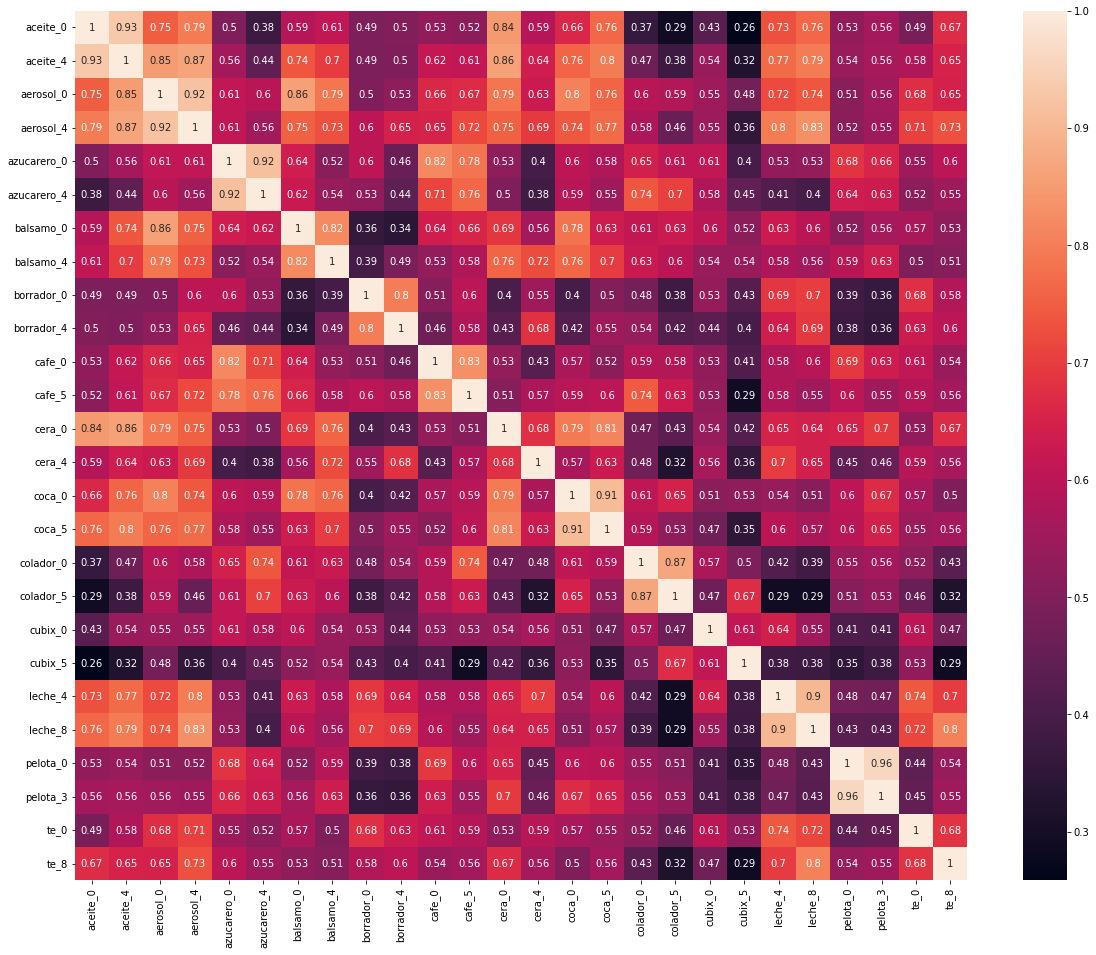

In [24]:
df_cm = pd.DataFrame(np_matrix, index = [i for i in image_names_ext2],
                  columns = [i for i in image_names_ext2])
plt.figure(figsize = (20,16))
sn.heatmap(df_cm, annot=True)